I want to double check the number of gen muons and the shape of the dR(mu, mu) distributions in a few samples to compare with observations Joaquin has made while working on trigger efficiency studies. He is using a different set of ntuples that includes trigger information, so it may be useful to check that our observations match.

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    "2Mu2E_100GeV_0p25GeV_20mm",
    "2Mu2E_500GeV_0p25GeV_4mm",
    "2Mu2E_500GeV_1p2GeV_19mm",
    "2Mu2E_1000GeV_5GeV_40mm",   
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["pvAndCosmic_cuts"]
p = sidm_processor.SidmProcessor(
    channels,
    ["muon_base", "gen_base"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]
#hists = output["out"][samples[0]]["hists"]

Output()

Output()

In [3]:
print("Unweighted events in each sample")
for sample in samples:
    n_evts = out[sample]["cutflow"][channels[0]].n_input_evts(unweighted=True)
    print(f"{sample:26} {n_evts}")
print()
print("Weighted events in each sample")
for sample in samples:
    n_evts = out[sample]["cutflow"][channels[0]].n_input_evts()
    print(f"{sample:26} {n_evts:.1f}")

Unweighted events in each sample
2Mu2E_100GeV_0p25GeV_20mm  83214.0
2Mu2E_500GeV_0p25GeV_4mm   61837.0
2Mu2E_500GeV_1p2GeV_19mm   100001.0
2Mu2E_1000GeV_5GeV_40mm    87581.0

Weighted events in each sample
2Mu2E_100GeV_0p25GeV_20mm  52448.9
2Mu2E_500GeV_0p25GeV_4mm   34285.4
2Mu2E_500GeV_1p2GeV_19mm   54454.9
2Mu2E_1000GeV_5GeV_40mm    45699.4


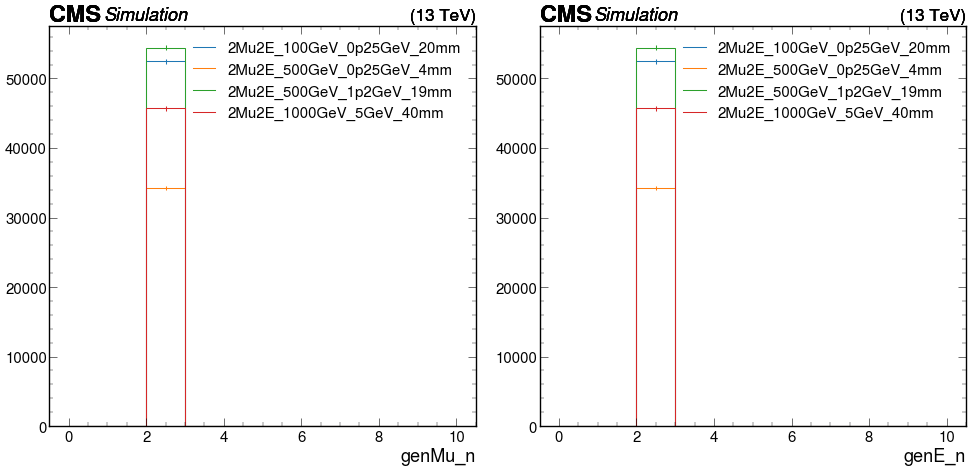

In [4]:
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu_n"][channels[0], :])
plt.legend(samples)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_n"][channels[0], :])
plt.legend(samples)
plt.tight_layout()

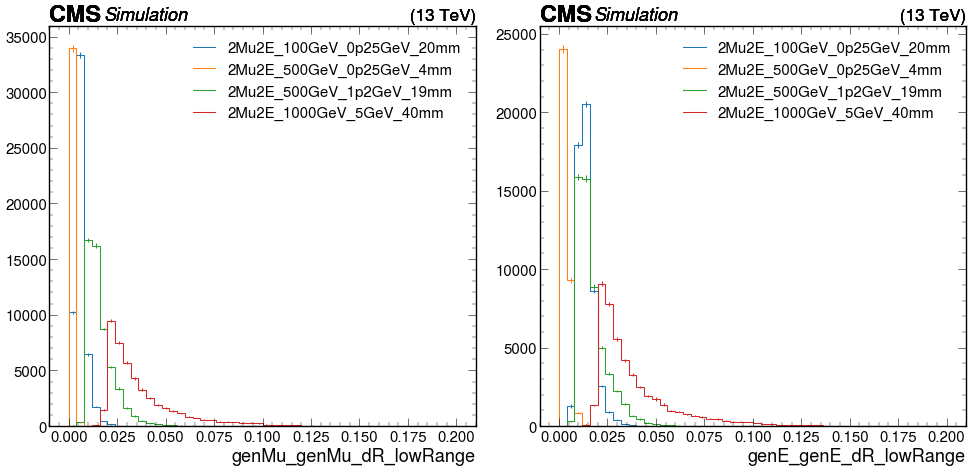

In [5]:
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu_genMu_dR_lowRange"][channels[0], :])
plt.legend(samples)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_genE_dR_lowRange"][channels[0], :])
plt.legend(samples)
plt.tight_layout()